<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-checo0228/blob/main/Sergio_MonteCarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sergio Eduardo López Lázaro - Monte Carlo Markov Chain Metropolis algorithm



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


In [ ]:
# Especifica el archivo de datos y el delimitador (; en este caso)
archivo_datos = 'olympic100m_men.txt'
delimitador = ','

# Carga los datos excluyendo la primera fila
data = np.loadtxt(archivo_datos, delimiter=delimitador, skiprows=1)

# Ahora puedes acceder a las columnas de datos como desees
# Por ejemplo, para cargar la primera y la segunda columna en x e y:
x = data[:, 0]  # Cargar la primera columna en x
y = data[:, 1]  # Cargar la segunda columna en y


In [ ]:

X = np.vstack((np.ones_like(x),x)).T
X.shape


(26, 2)

In [ ]:

def lineal (X, w):
  # x,y,w deben ser arreglos de numpy
  w = np.array(w)
  return X@w

In [ ]:
def logaritmo (y, x, w, model = lineal): #lo definimos de esta manera para no usar ciclos for para la sumatoria
  log = (y - model(x,w))**2
  log = np.sum(log)
  return log

def Prior(w, w_max, w_min):
    if w_min <= w <= w_max:
        return 1.0  # Prior uniforme dentro del rango
    else:
        return 0.0  # Prior igual a cero fuera del rango



In [ ]:
def MonteCarlo (x, y, w_inter, iter, sigma = 0.1, model = lineal, log = logaritmo):
  # Definimos el parámetro inicial
  theta_ini = [0,0]
  w0 = float(input('Indica el w0:'))
  theta_ini[0] = w0
  w1 = float(input('Indica el w1:'))
  theta_ini[1] = w1


  thetas = []

  i = 0
  while i < iter:
    # Generamos la propuesta
    theta_prop = [np.random.normal(theta_ini[0], sigma), np.random.normal(theta_ini[1], sigma)]

    log_ini = logaritmo(y, x, theta_ini) + np.log(Prior(theta_ini, w_inter[0], w_inter[1]))
    log_prop = logaritmo(y, x, theta_prop) + np.log(Prior(theta_prop, w_inter[0], w_inter[1]))

    if log_prop > log_ini:
      thetas.append(theta_prop)
      theta_ini = theta_prop
    else:
      thetas.append(theta_ini)

    if log_prop == log_ini:
      thetas.append(theta_prop)
      theta_ini = theta_prop
    else:
      thetas.append(theta_ini)
    i +=1

  return np.array(thetas)

In [ ]:
# Normalización de datos
mean_x = np.mean(x)
std_x = np.std(x)
mean_y = np.mean(y)
std_y = np.std(y)

x_normalized = (x - mean_x) / std_x
y_normalized = (y - mean_y) / std_y


Indica el w0:47
Indica el w1:-3


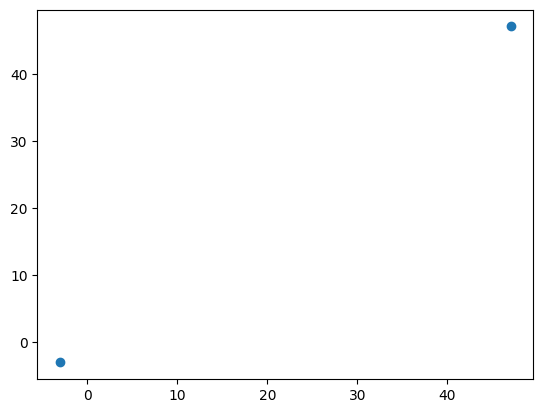

In [ ]:
w_inter = [[50, 45], [19, -224]]
chain = MonteCarlo(X, y, w_inter, iter = 10000, sigma = 0.05)

w0s = chain[0].T
w1s = chain[1].T

plt.scatter(w0s, w1s)

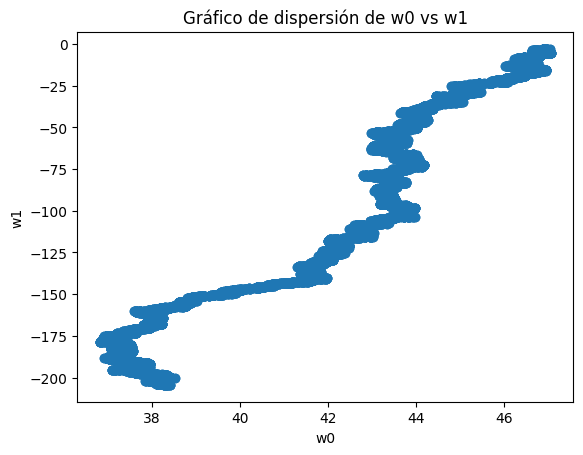

In [ ]:
w0s = chain[:, 0]
w1s = chain[:, 1]

# Crear un gráfico de dispersión
plt.scatter(w0s, w1s, alpha=1)  # 'alpha' controla la transparencia de los puntos

# Etiquetas de los ejes
plt.xlabel('w0')
plt.ylabel('w1')

# Título del gráfico
plt.title('Gráfico de dispersión de w0 vs w1')

# Mostrar el gráfico
plt.show()


In [ ]:
w0_min = np.min(w0s)
w0_max = np.max(w0s)
w1_min = np.min(w1s)
w1_max = np.max(w1s)

# Agregar un margen adicional al rango de valores
margin = 0.1
w0_range = w0_max - w0_min
w1_range = w1_max - w1_min

w0_min -= margin * w0_range
w0_max += margin * w0_range
w1_min -= margin * w1_range
w1_max += margin * w1_range

print('W0 min: ',w0_min)
print('W0 max: ',w0_max)
print('W1 min: ',w1_min)
print('W1 max: ',w1_max)

W0 min:  35.7860545037053
W0 max:  48.079524138239236
W1 min:  -224.46797826813628
W1 max:  17.09068174700789
